# Capstone Project - Spotify Music

#### Import Necessary Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [141]:
df = pd.read_csv('../Downloads/spotify_dataset.csv', index_col=0)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### EDA Section

In [127]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

_20 columns: 6 non-numeric and 14 numeric_

In [5]:
#Removing commas from string and then converting to numeric value
# df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '')
# df['Length (Duration)'] = df['Length (Duration)'].astype('int')

In [129]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [130]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

_Only one row had three values missing: artist, album_name and track_name are null. We will drop this row_

In [142]:
df = df.dropna()

In [9]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [143]:
duplicates = df['track_id'].duplicated().sum()
duplicates

24259

_There are more than 24,000 rows of duplicates. We drop the duplicate columns in order to keep the 'track_id' to a unique value for each row_

In [149]:
df = df.drop_duplicates(subset=['track_id'], keep='first')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


_We go from 114000 rows to 89741 after the removal_

### Data Visualization

**Artist with the Most Number of Tracks**

In [13]:
artist = df.groupby('artists')['track_id'].nunique()
artist = pd.DataFrame(artist).reset_index()
artist = artist.sort_values(['track_id'], ascending=False).head(11)
artist

,artists,track_id
10418,George Jones,260
30954,my little airport,171
26983,The Beatles,149
2783,BTS,143
12000,Håkan Hellström,141
10764,Glee Cast,139
11326,Hank Williams,136
16049,Linkin Park,133
24435,Scooter,130
20555,OneRepublic,124


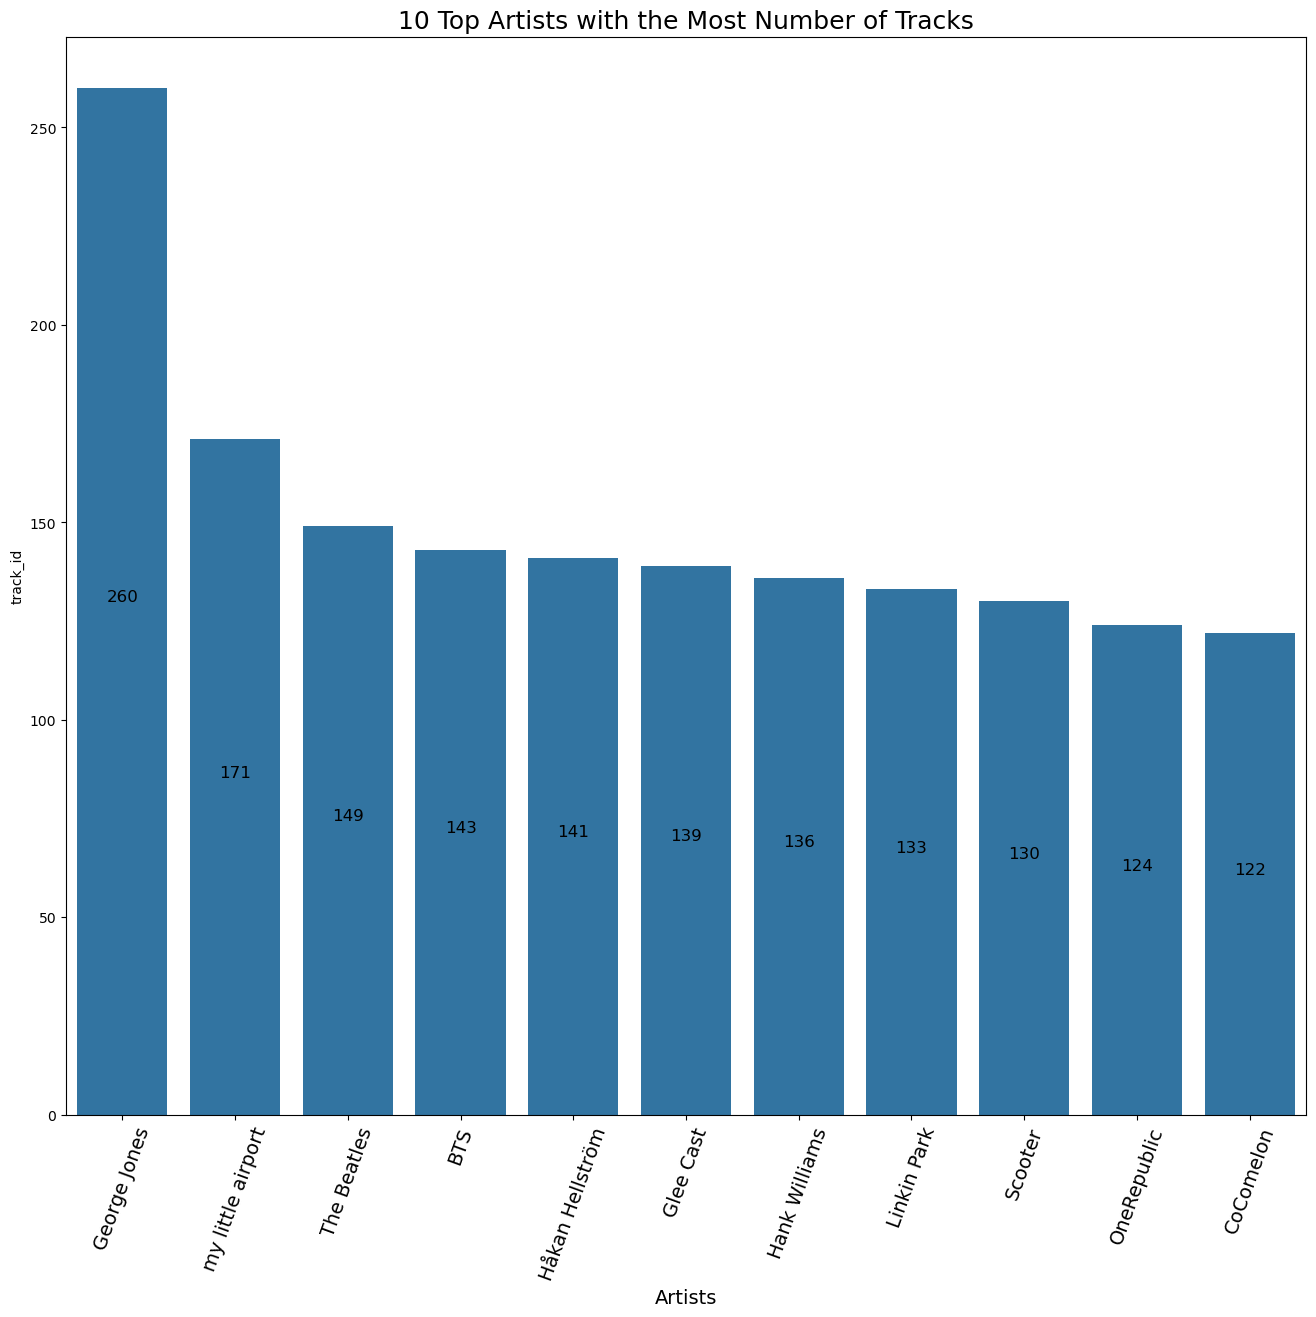

In [14]:
#Plotting bar
fig, ax = plt.subplots(figsize=(16,14))
ax = sns.barplot(data=artist, x='artists', y='track_id')
ax.bar_label(ax.containers[0], fontsize=12, padding=3, label_type='center')
ax.set_xlabel('Artists', fontsize = 14)
plt.title('10 Top Artists with the Most Number of Tracks', fontsize=18)
plt.xticks(rotation=70, fontsize = 14);

**Pie Chart with the Distribution of Explicit Music in the Dataset**

In [15]:
explicit = df.groupby('explicit')['track_id'].count()
explicit

explicit
False    82036
True      7704
Name: track_id, dtype: int64

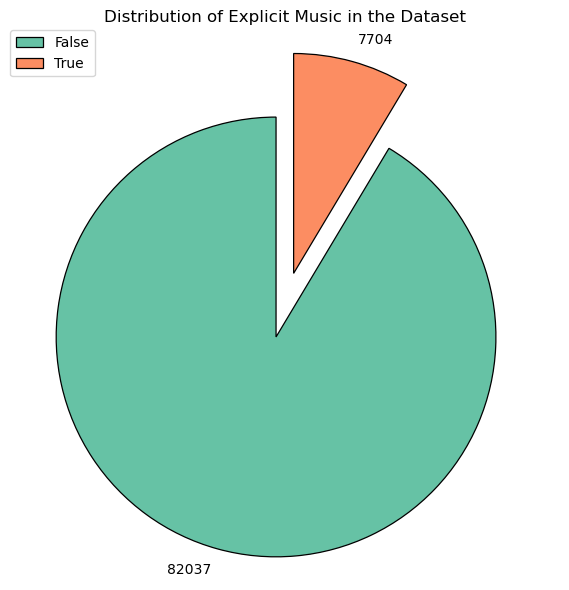

In [133]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df.groupby('explicit')['track_id'].count(),labels=df.groupby('explicit')['track_id'].count(),
        colors=sns.color_palette('Set2'), startangle=90, 
      explode=[0.15, 0.15],
      wedgeprops={'linewidth': 0.9, 'edgecolor': 'black'},
      textprops={'size':'medium', 'color': 'black'})
plt.legend(df['explicit'].unique(),loc='upper left', borderaxespad=0)
plt.title("Distribution of Explicit Music in the Dataset")
plt.tight_layout();

**Correlation Heatmap**

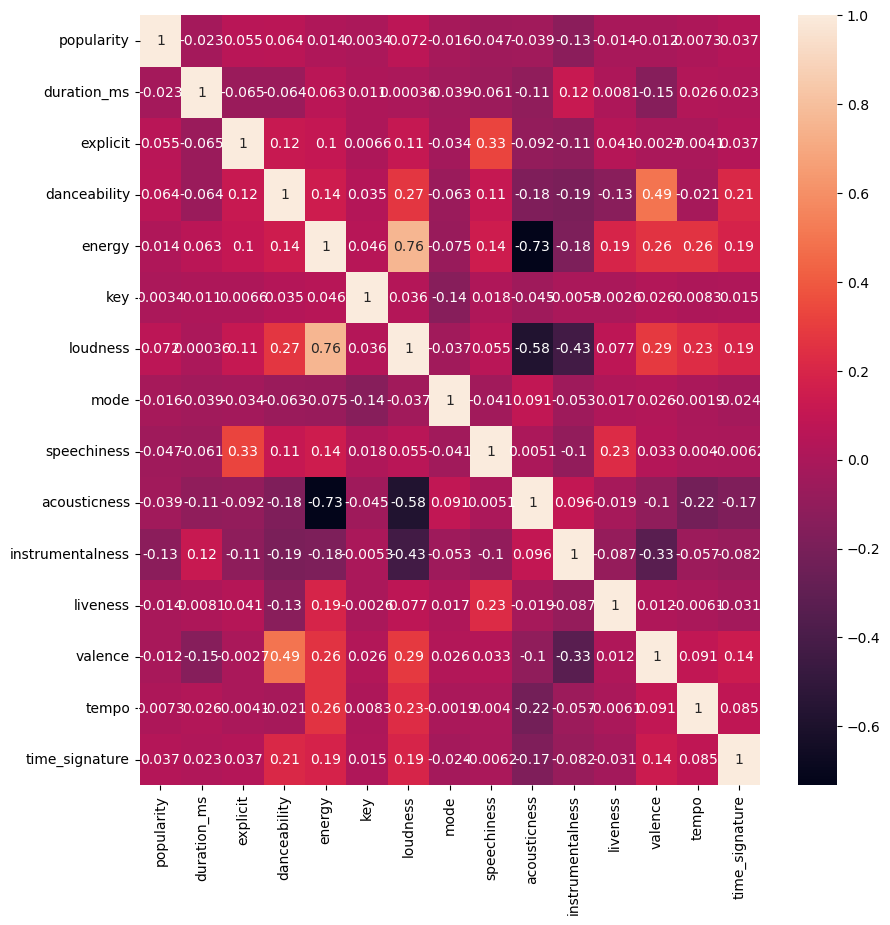

In [140]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

<Axes: ylabel='Frequency'>

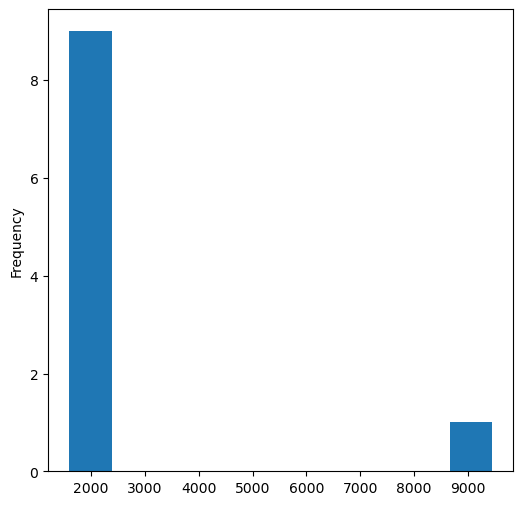

In [152]:
genres = df['popularity'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(kind='hist')

# Machine Learning

In [17]:
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


## Clustering Problem 1 - KMeans Clustering

In [135]:
#Drop Title, Artist & Genre
df = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1)

In [96]:
#Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

**Finding the best value for k**

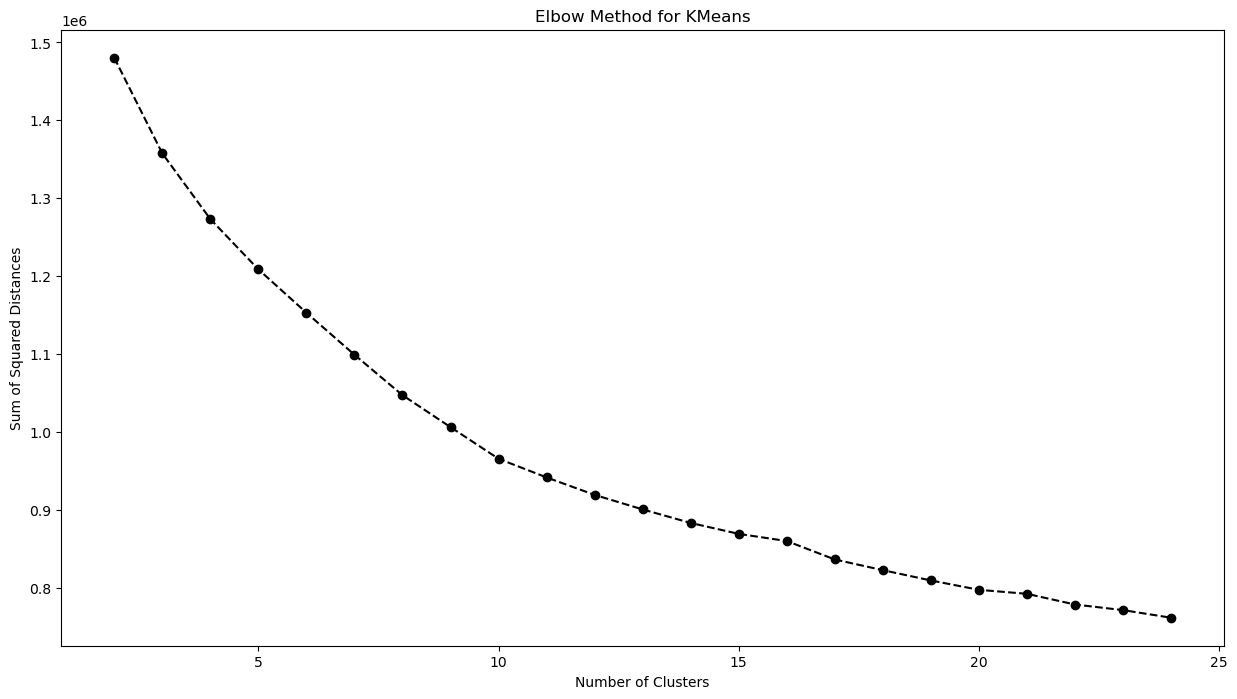

In [97]:
from sklearn.cluster import KMeans

ssd = []

#Finding a value ranging from 2 to 24
for k in range(2, 25):
    kmeans = KMeans(n_clusters = k) #create model of k value
    kmeans.fit(X) 
    ssd.append(kmeans.inertia_) #Storing ssd values for k

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(2,25),ssd, 'ko--');
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for KMeans');

**_The decrease starts to stabilize when k=10. That would be the ideal number of clusters_**

In [100]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

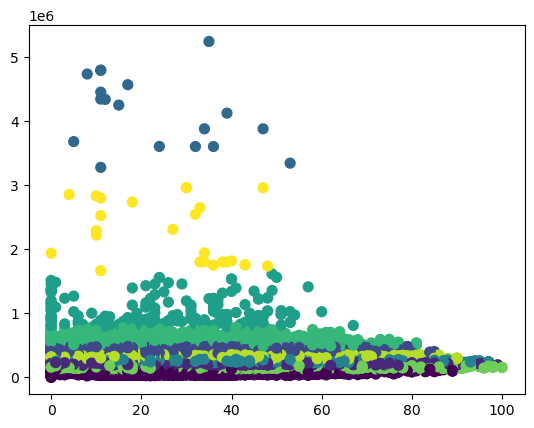

In [106]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis');
#plt.ylim([0, 1]);
#plt.xlim([0, 2])

## Clustering Problem 1 - PCA Clustering with KMeans

In [73]:
#Drop Title, Artist & Genre
#df = pd.read_csv('../Downloads/spotify_dataset.csv', index_col=0)
df = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1)

In [66]:
X = pd.get_dummies(df)

In [74]:
# Scale data

scaler = StandardScaler()
X = scaler.fit_transform(df)

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(df)

PCA()

In [76]:
pca.explained_variance_ratio_

array([9.99999875e-01, 7.81351605e-08, 4.31992938e-08, 2.10175442e-09,
       1.09772580e-09, 1.98498477e-11, 1.58422108e-11, 8.48546723e-12,
       6.92725545e-12, 5.96671545e-12, 4.54503485e-12, 3.42799481e-12,
       1.64825098e-12, 1.13046315e-12, 6.89237516e-13])

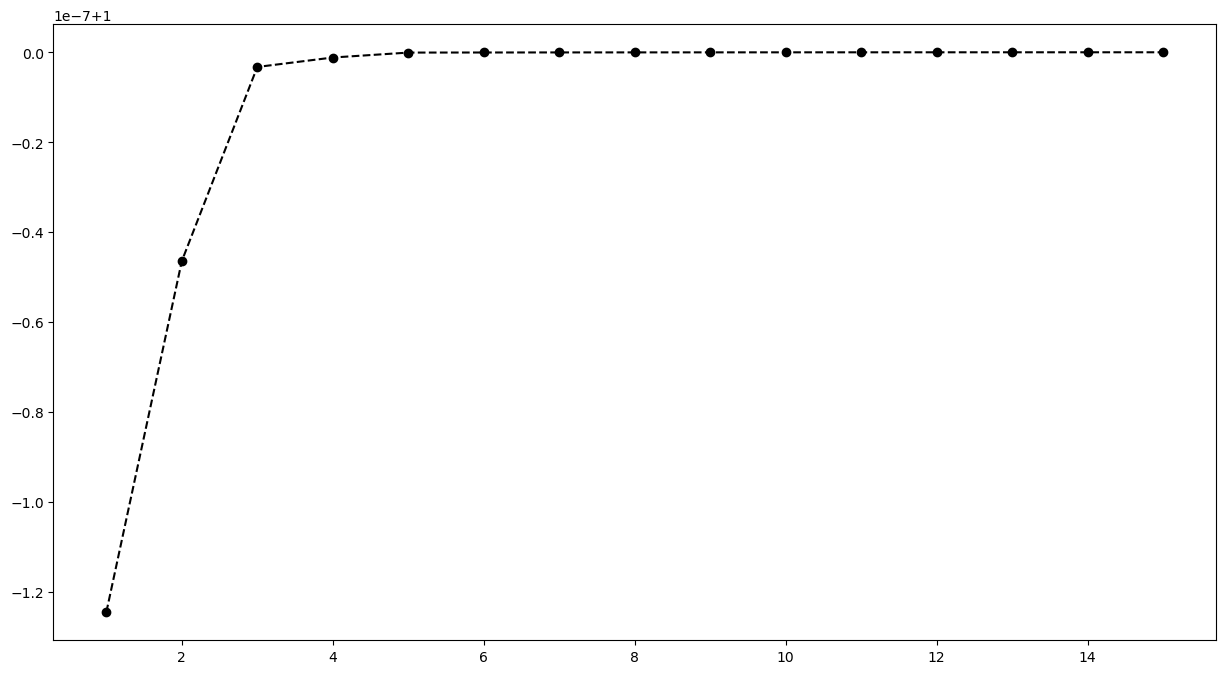

In [77]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), 'ko--');

_Considering the graph above, we will use n_components = 3_

**Using n_components = 3**

In [78]:
pca = PCA(n_components = 3)
pca_model = pca.fit(df)

In [79]:
pca.transform(df)

array([[ 2.63684659e+03,  3.32614266e+01,  4.05641028e+01],
       [-7.84191534e+04,  4.39299585e+01,  2.25691968e+01],
       [-1.72031535e+04,  4.51775487e+01,  2.47744280e+01],
       ...,
       [ 4.34368470e+04, -9.56592174e+00, -1.14243961e+01],
       [ 5.58638470e+04, -1.35034226e+01,  7.50229630e+00],
       [ 1.37968466e+04,  4.33362209e+01, -1.02355529e+01]])

In [80]:
scores = pca.transform(df)

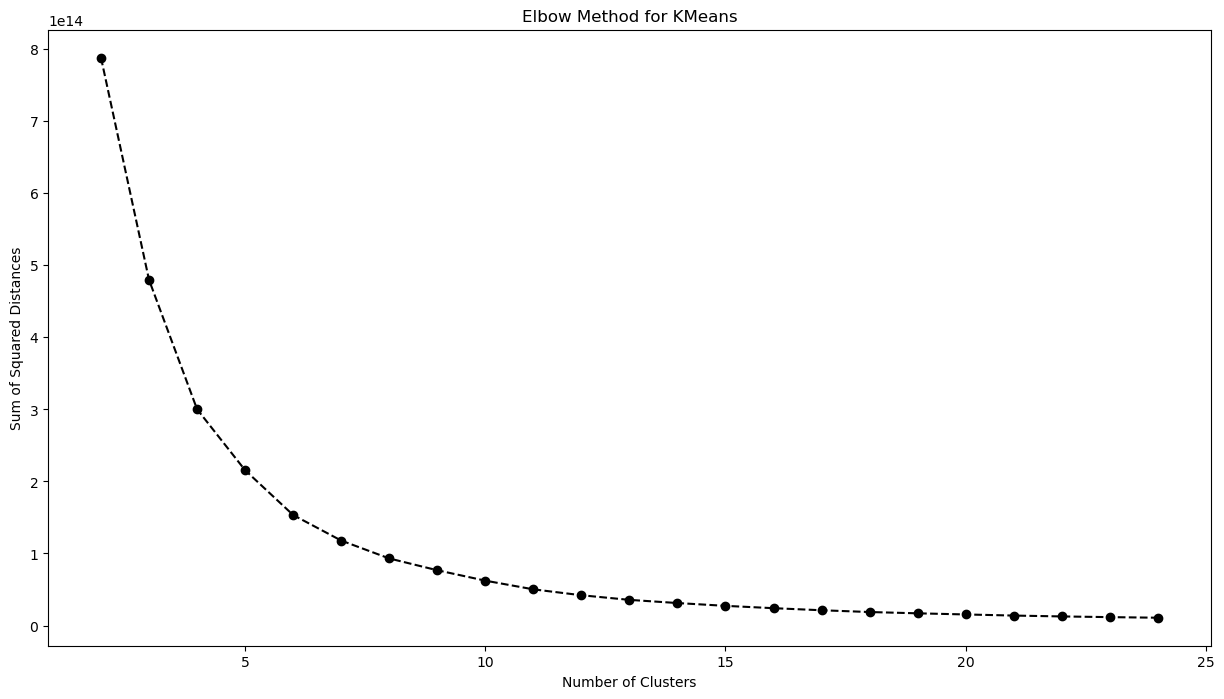

In [81]:
ssd = []

#Finding a value ranging from 2 to 24
for k in range(2, 25):
    kmeans = KMeans(n_clusters = k) #create model of k value
    kmeans.fit(scores) 
    ssd.append(kmeans.inertia_) #Storing ssd values for k

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(2,25),ssd, 'ko--');
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for KMeans');

_With the addition of the PCA steps at the beginning, we see a different graph to the first one. In this case, k=5 would be the best option_

In [85]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [82]:
pca_kmeans = KMeans(n_clusters=5)
pca_kmeans.fit(df)

KMeans(n_clusters=5)

In [83]:
y_kmeans = pca_kmeans.predict(df)

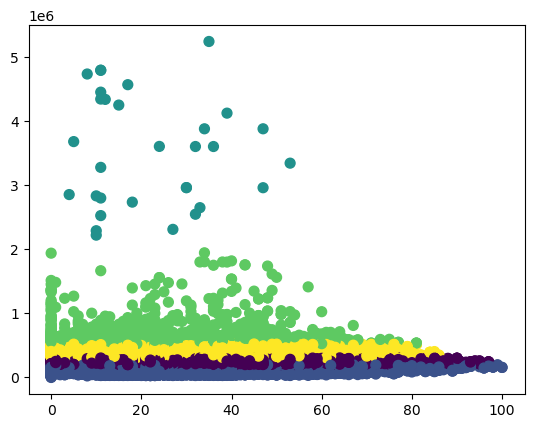

In [91]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis');

In [107]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [118]:
a = df[df['popularity'] == 87]
a

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2000,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4
3000,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4
3300,87,206000,True,0.587,0.742,6,-6.640,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,4
11014,87,232893,False,0.566,0.885,8,-4.528,1,0.0818,0.09580,0.000100,0.3340,0.304,90.990,4
20030,87,172714,False,0.762,0.861,0,-3.296,1,0.0955,0.01850,0.000000,0.2640,0.955,120.048,4
20251,87,155588,False,0.912,0.774,0,-4.673,0,0.0455,0.12100,0.012700,0.1010,0.632,119.966,4
20364,87,232893,False,0.566,0.885,8,-4.528,1,0.0818,0.09580,0.000100,0.3340,0.304,90.990,4
20419,87,151475,False,0.845,0.797,1,-4.984,1,0.1390,0.05820,0.000006,0.1670,0.422,121.985,4
20654,87,206070,False,0.756,0.697,8,-6.377,1,0.0401,0.18200,0.000000,0.3330,0.956,94.996,4
20910,87,233478,False,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,4


In [121]:
new_data = [79,153800,False,0.500,0.501,0,-8.284,0,0.0376,0.46200,0.000000,0.2600,0.623,144.438,4],[87,206710,True,0.644,0.648,1,-4.601,1,0.1180,0.27600,0.000000,0.1350,0.440,179.951,4]

_Two new data rows_

In [123]:
results = pca_kmeans.predict(new_data)
results

array([1, 0], dtype=int32)